# Movie Recommender System

### Initialization


#### Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### Import Dataset

In [2]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#### Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


#### Missing Values

In [4]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

#### Description

In [5]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [6]:
df.duplicated().sum()

0

#### Remove Low Rated Movies

In [7]:
# df = df.sort_values(by='Popularity',ascending=False).head(3500)
# df.head()

### Exploratory Data Analysis

#### Yearwise Analysis

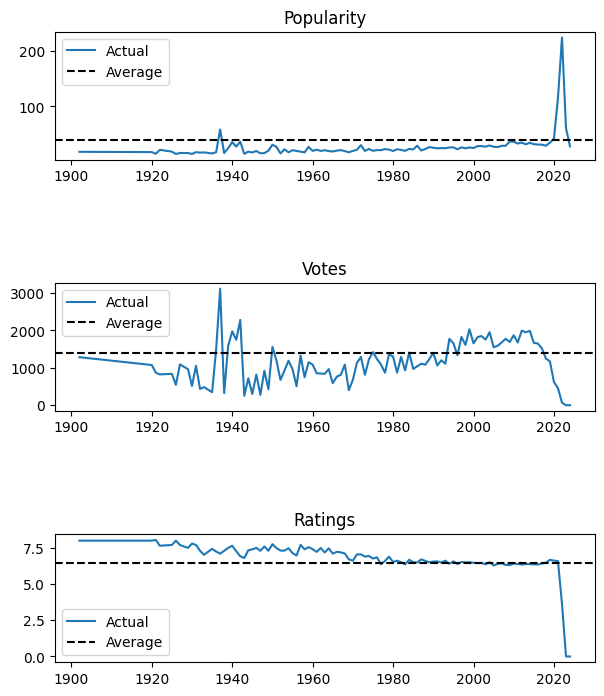

In [8]:
df['Year'] = [int(x[0:4]) for x in df['Release_Date']]
yearwise = df[['Year','Popularity','Vote_Count','Vote_Average']].groupby(['Year']).mean()
average = df[['Year','Popularity','Vote_Count','Vote_Average']].mean()

fig,ax = plt.subplots(3,1)
ax[0].plot(yearwise.index,yearwise['Popularity'],label='Actual')
ax[0].axhline(y = average[1], linestyle = '--',label='Average',c='black')
ax[0].set_title('Popularity')
ax[0].legend(loc='best')

ax[1].plot(yearwise.index,yearwise['Vote_Count'],label='Actual')
ax[1].axhline(y = average[2], linestyle = '--',label='Average',c='black')
ax[1].set_title('Votes')
ax[1].legend(loc='best')

ax[2].plot(yearwise.index,yearwise['Vote_Average'],label='Actual')
ax[2].axhline(y = average[3], linestyle = '--',label='Average',c='black')
ax[2].set_title('Ratings')
ax[2].legend(loc='best')

fig.tight_layout(pad=2.0)
fig.set_figheight(8)
plt.show()
# average

#### Genre-Wise Split

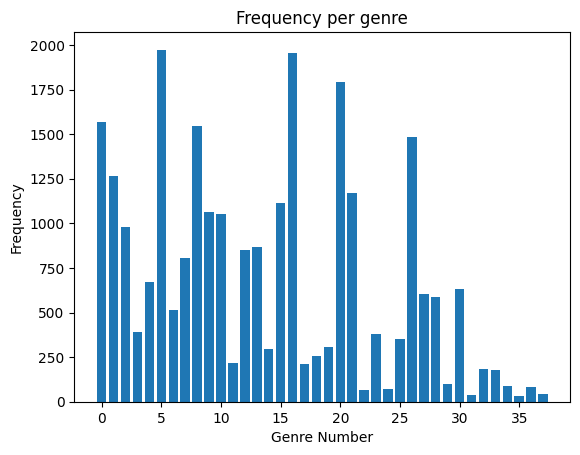

Maximum Genre and Value:  Thriller | 1973
Minimum Genre and Value:  Documentary | 31


In [9]:
genre_values = {}
value_dict = {}
def genre_fill(row):
    for genre in row.split(','):
        if genre in genre_values.keys():
            genre_values[genre]+=1
        else:
            genre_values[genre]=1

for row in df['Genre']:
    genre_fill(row)
    
plt.bar(np.arange(len(genre_values.keys())),genre_values.values())
plt.title('Frequency per genre')
plt.xlabel('Genre Number')
plt.ylabel('Frequency')
plt.show()

max_key = max(genre_values, key=genre_values.get)
min_key = min(genre_values, key=genre_values.get)
print(f"Maximum Genre and Value: {max_key} | {max(genre_values.values())}")
print(f"Minimum Genre and Value: {min_key} | {min(genre_values.values())}")

#### Heatmap

<Axes: >

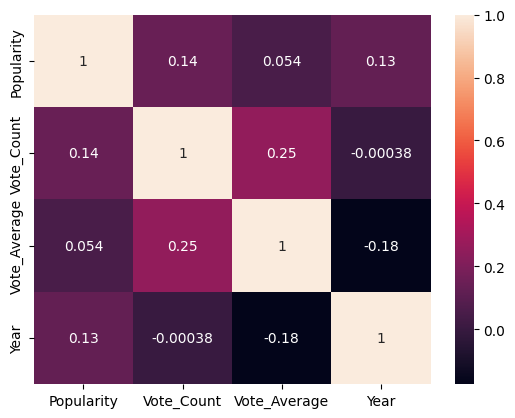

In [10]:
cols = df.describe().columns
sb.heatmap(df[cols].corr(),annot=True)

#### Pairplots

[]

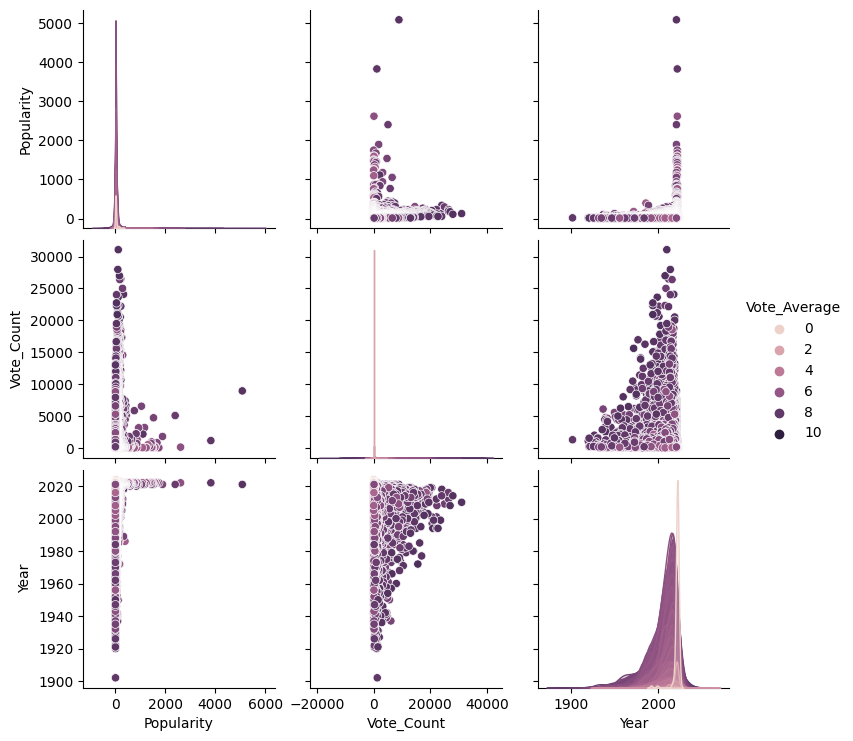

In [11]:
sb.pairplot(df,hue='Vote_Average')
plt.plot()

### Preprocessing

In [12]:
df['Overview_Stemmed'] = df['Overview'] + " " + df['Original_Language'] + " " + df['Genre'] + " " + df['Title']

#### Lowercasing

In [13]:
def lower(text):
    return text.lower()

df['Title_Lower'] = df['Title'].apply(lower)

#### Porter Stemming

In [14]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stem = PorterStemmer()
def stem_sentence(text):
    y = []
    for word in text.split(" "):
        y.append(stem.stem(word))
    return " ".join(val for val in y)   

df['Overview_Stemmed'] = df['Overview_Stemmed'].apply(stem_sentence)

#### Vectorizing

In [15]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'),max_features=10000)
numeric_overview = vectorizer.fit_transform(df['Overview_Stemmed']).toarray()
numeric_overview.shape

(9827, 10000)

### Similarity Matrix


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(numeric_overview)
similarity_matrix[0]

array([1.        , 0.01124651, 0.01711177, ..., 0.02787156, 0.02300361,
       0.02139829])

### SpaCy Similarity Mispell Handling

In [17]:
# python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load('en_core_web_sm')
def matchTitle(title):
    l = []
    for word in title.split(' '):
        if word not in stopwords.words('english'):
            l.append(word)
    title = " ".join(l).strip()
    doc = nlp(lower(title))
    l = []
    for row in df['Title']:
        l.append(nlp(row).similarity(doc))
    df['Similar'] = l
    return df.sort_values(by='Similar',ascending=False).head(6).sort_values(by='Popularity',ascending=False)
    
print(matchTitle("Star wars: The Return of Jedi"))

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_9788\256914836.py:13: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  l.append(nlp(row).similarity(doc))


     Release_Date                                   Title   
431    2012-06-20         Abraham Lincoln: Vampire Hunter  \
785    2015-12-15            Star Wars: The Force Awakens   
1622   2013-07-30  Justice League: The Flashpoint Paradox   
6062   2020-12-04       Captain Underpants: Mega Blissmas   
6771   2018-12-21            The Snow Queen: Mirror Lands   
8447   1981-12-25                   Angel Guts: Red Porno   

                                               Overview  Popularity   
431   President Lincoln's mother is killed by a supe...     116.620  \
785   Thirty years after defeating the Galactic Empi...      77.811   
1622  The Flash finds himself in a war-torn alternat...      47.571   
6062  Christmas gets weird - really weird - after Ge...      18.409   
6771  A mighty king has lost his family because of t...      17.068   
8447  Nami is a department store worker who agrees t...      14.712   

      Vote_Count  Vote_Average Original_Language   
431         2728      

### Fetch Function Cosine Metric

In [20]:
def fetch(movie):
    try:
        index = df[df['Title_Lower'] == movie.lower()].index[0]
    except:
        index = df[df['Title_Lower'] == matchTitle(movie)].index[0]  # Ensure matchTitle is defined or imported
    movies = sorted(list(enumerate(similarity_matrix[index])), reverse=True, key=lambda x: x[1])[1:6]
    similar_movies = []
    for movie in movies:
        similar_movies.append(df.iloc[movie[0]])
    return pd.DataFrame(similar_movies).sort_values(by='Popularity', ascending=False).drop(['Title_Lower', 'Overview_Stemmed'], axis=1)

fetch('the ones and onlys')


C:\Users\Rishabh\AppData\Local\Temp\ipykernel_9788\256914836.py:13: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  l.append(nlp(row).similarity(doc))


ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

### Pickling

In [ ]:
import pickle

f = open('dataframe.pkl','wb')
pickle.dump(df,f)
f.close()

fm = open('matrix.pkl','wb')
pickle.dump(similarity_matrix,fm)
fm.close()